<a href="https://colab.research.google.com/github/kyuQee/LearningML/blob/main/Pulse_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synthetic Skewed Gaussian Pulse

## Skewed Gaussian Function  

The pulse is modeled using a **skewed Gaussian function**:

$$
f(x) =
\begin{cases}
A \exp\left(-\frac{(x - \mu)^2}{2\sigma_{\text{left}}^2}\right), & x < \mu \\  
A \exp\left(-\frac{(x - \mu)^2}{2\sigma_{\text{right}}^2}\right), & x \geq \mu  
\end{cases}
$$

where:  

- Peak position:  $ \mu $  

- Amplitude:  $ A $  

- Standard deviation on the left side:  $ \sigma_{\text{left}} $  

- Standard deviation on the right side:  $ \sigma_{\text{right}} $  

---

## Threshold Calculation  

The theoretical positions where intensity falls to **10%** of \( A \) are derived from:  

$$
A \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) = 0.1A
$$

Dividing by \( A \) and taking the **natural logarithm**:  

$$
-\frac{(x - \mu)^2}{2\sigma^2} = \ln(0.1)
$$

Solving for \( x \):  

$$
|x - \mu| = \sqrt{2 \sigma^2 (-\ln 0.1)}
$$

Thus, the **left and right threshold positions** are:  

$$
x_{\text{left}} = \mu - \sqrt{2 \sigma_{\text{left}}^2 (-\ln 0.1)}
$$  

$$
x_{\text{right}} = \mu + \sqrt{2 \sigma_{\text{right}}^2 (-\ln 0.1)}
$$  

---

## Noise Addition  

Gaussian noise is added to the pulse:  

$$
y_{\text{noisy}} = f(x) + \mathcal{N}(0, \sigma_{\text{noise}})
$$

where  $ \mathcal{N}(0, \sigma_{\text{noise}}) $  represents **Gaussian noise** with zero mean and standard deviation $\sigma_{\text{noise}}$.  

---

## Visualization  

- The pulse is plotted as both a **line plot** and **scatter plot**.  
- Vertical lines are drawn at:  

  - **Peak position** ( $ \mu $ ), in **red**  
  - **Left 10% threshold** ( $ x_{\text{left}} $ ), in **green**  
  - **Right 10% threshold** ( $ x_{\text{right}} $ ), in **orange**  


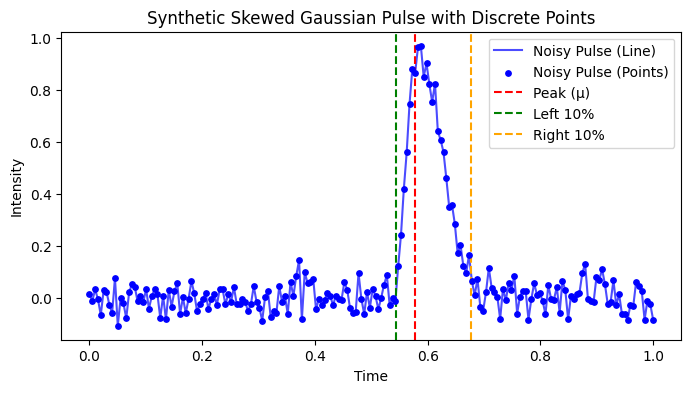

Peak (μ): 0.5782135445229827
Left 10% position: 0.5447293782736822
Right 10% position: 0.6770030522881826


In [61]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(42)


# Define a skewed Gaussian function
def skewed_gaussian(x, mu, sigma_left, sigma_right, A):
    """
    Returns a skewed Gaussian pulse:
      For x < mu:  A * exp(-((x-mu)^2) / (2*sigma_left^2))
      For x >= mu: A * exp(-((x-mu)^2) / (2*sigma_right^2))
    """
    return np.where(x < mu,
                    A * np.exp(-((x - mu)**2) / (2 * sigma_left**2)),
                    A * np.exp(-((x - mu)**2) / (2 * sigma_right**2)))

def generate_pulse(window_length=200, T=1.0, noise_std=0.05):
    """
    Generates a synthetic pulse in a discrete window.

    Parameters:
      window_length: number of discrete time points
      T: total duration (time range from 0 to T)
      noise_std: standard deviation of additive Gaussian noise

    Returns:
      x: time vector
      noisy_signal: synthetic noisy intensity values
      mu: true peak position
      left_thresh: theoretical left 10% threshold position
      right_thresh: theoretical right 10% threshold position
    """
    # Create time axis (discrete samples)
    x = np.linspace(0, T, window_length)

    # Randomly choose a peak position (avoid edges so thresholds are in-bound)
    mu = np.random.uniform(T*0.2, T*0.8)
    # Random amplitude around 1
    A = np.random.uniform(0.8, 1.2)
    # Random standard deviations for left and right side
    sigma_left = np.random.uniform(0.01, 0.05)
    sigma_right = np.random.uniform(0.01, 0.05)

    # Generate the clean pulse signal
    clean_signal = skewed_gaussian(x, mu, sigma_left, sigma_right, A)

    # Calculate theoretical positions where intensity falls to 10% of A.
    # Solve: exp(-((x-mu)^2)/(2*sigma^2)) = 0.1  ==>  |x-mu| = sqrt(2 * sigma^2 * (-ln(0.1)))
    left_thresh = mu - np.sqrt(2 * sigma_left**2 * (-np.log(0.1)))
    right_thresh = mu + np.sqrt(2 * sigma_right**2 * (-np.log(0.1)))

    # Add Gaussian noise to the clean signal
    noisy_signal = clean_signal + np.random.normal(0, noise_std, size=window_length)

    # Plotting the results with both connected lines and individual points
    plt.figure(figsize=(8, 4))

    # Connected line plots
    plt.plot(x, noisy_signal, label="Noisy Pulse (Line)", color='blue', alpha=0.7)
    # plt.plot(x, clean_signal, label="Clean Pulse (Line)", linestyle="--", color='gray', alpha=0.7)

    # Scatter plot for unconnected points
    plt.scatter(x, noisy_signal, color='blue', s=15, label="Noisy Pulse (Points)", zorder=3)
    # plt.scatter(x, clean_signal, color='gray', s=15, label="Clean Pulse (Points)", zorder=3, alpha=0.5)

    # Mark key positions with vertical lines
    plt.axvline(mu, color='red', linestyle='--', label="Peak (μ)")
    plt.axvline(left_thresh, color='green', linestyle='--', label="Left 10%")
    plt.axvline(right_thresh, color='orange', linestyle='--', label="Right 10%")

    plt.xlabel("Time")
    plt.ylabel("Intensity")
    plt.title("Synthetic Skewed Gaussian Pulse with Discrete Points")
    plt.legend()
    plt.show()

    return x, noisy_signal, mu, left_thresh, right_thresh

# Generate and plot one synthetic pulse with both line and scatter plots
x, noisy_signal, mu, left_thresh, right_thresh = generate_pulse(window_length=200, T=1)
print("Peak (μ):", mu)
print("Left 10% position:", left_thresh)
print("Right 10% position:", right_thresh)


In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Set a global random seed for reproducibility
np.random.seed(42)

# Define a skewed Gaussian function
def skewed_gaussian(x, mu, sigma_left, sigma_right, A):
    """
    Returns a skewed Gaussian pulse:
      For x < mu:  A * exp(-((x-mu)^2) / (2*sigma_left^2))
      For x >= mu: A * exp(-((x-mu)^2) / (2*sigma_right^2))
    """
    return np.where(x < mu,
                    A * np.exp(-((x - mu)**2) / (2 * sigma_left**2)),
                    A * np.exp(-((x - mu)**2) / (2 * sigma_right**2)))

#Removed plotting
def generate_pulse(window_length, T, noise_std):
    """
    Generates a synthetic pulse in a discrete window.

    Parameters:
      window_length: number of discrete time points for this pulse
      T: total duration (time range from 0 to T) for this pulse
      noise_std: standard deviation of additive Gaussian noise for this pulse

    Returns:
      x: time vector for the pulse
      noisy_signal: synthetic noisy intensity values (discrete samples)
      mu: true peak position
      left_thresh: theoretical left 10% threshold position
      right_thresh: theoretical right 10% threshold position
    """
    # Create time axis (discrete samples) unique for each pulse
    x = np.linspace(0, T, window_length)

    # Randomly choose a peak position (avoid edges so thresholds are in-bound)
    mu = np.random.uniform(T * 0.2, T * 0.8)
    # Random amplitude around 1
    A = np.random.uniform(0.8, 1.2)
    # Random standard deviations for left and right side
    sigma_left = np.random.uniform(0.01, 0.05)
    sigma_right = np.random.uniform(0.01, 0.05)

    # Generate the clean pulse signal
    clean_signal = skewed_gaussian(x, mu, sigma_left, sigma_right, A)

    # Calculate theoretical positions where intensity falls to 10% of A.
    # Solve: exp(-((x-mu)^2)/(2*sigma^2)) = 0.1  ==>  |x-mu| = sqrt(2 * sigma^2 * (-ln(0.1)))
    left_thresh = mu - np.sqrt(2 * sigma_left**2 * (-np.log(0.1)))
    right_thresh = mu + np.sqrt(2 * sigma_right**2 * (-np.log(0.1)))

    # Add Gaussian noise to the clean signal
    noisy_signal = clean_signal + np.random.normal(0, noise_std, size=window_length)

    return x, noisy_signal, mu, left_thresh, right_thresh

# PARAMETERS
n_samples = 50000          # Number of pulses to generate
window_length = 200  # (min, max) discrete time points per pulse
T = 1          # (min, max) total time duration for pulses
noise_std_range = [0.1, 0.5] # (min, max) standard deviation of Gaussian noise

# Containers for storing data (each pulse can have a different time vector)
xs = []      # To store each pulse's time vector (unique per pulse)
signals = [] # To store each pulse's noisy signal (unique length per pulse)
mus = []     # To store the peak positions
lefts = []   # To store the left 10% threshold positions
rights = []  # To store the right 10% threshold positions

# Generate pulses and accumulate data
for i in range(n_samples):
    # Randomly pick parameters for this pulse:
    w_length = window_length
    T_val = T
    noise_val = np.random.uniform(noise_std_range[0], noise_std_range[1])

    # Generate pulse with current parameters
    x, signal, mu, left_thresh, right_thresh = generate_pulse(w_length, T_val, noise_val)

    xs.append(x)
    signals.append(signal)
    mus.append(mu)
    lefts.append(left_thresh)
    rights.append(right_thresh)

# Convert peak and threshold lists to numpy arrays
mus = np.array(mus)
lefts = np.array(lefts)
rights = np.array(rights)

with h5py.File("synthetic_pulses_data.h5", "w") as hf:
    # Create groups to organize pulses and their time vectors
    pulse_grp = hf.create_group("pulses")
    time_grp = hf.create_group("times")

    # Save each pulse and its corresponding time vector individually
    for i, (x, signal) in enumerate(zip(xs, signals)):
        pulse_grp.create_dataset(f"pulse_{i}", data=signal)
        time_grp.create_dataset(f"time_{i}", data=x)

    # Save other parameters as homogeneous arrays
    hf.create_dataset("mus", data=np.array(mus))
    hf.create_dataset("lefts", data=np.array(lefts))
    hf.create_dataset("rights", data=np.array(rights))

print("Dataset saved to synthetic_pulses_data.h5")

Dataset saved to synthetic_pulses_data.h5


Pulse index (n): 10010
Peak (μ): 0.7458824634273584
Left 10% threshold: 0.654567708896075
Right 10% threshold: 0.8022667505686524


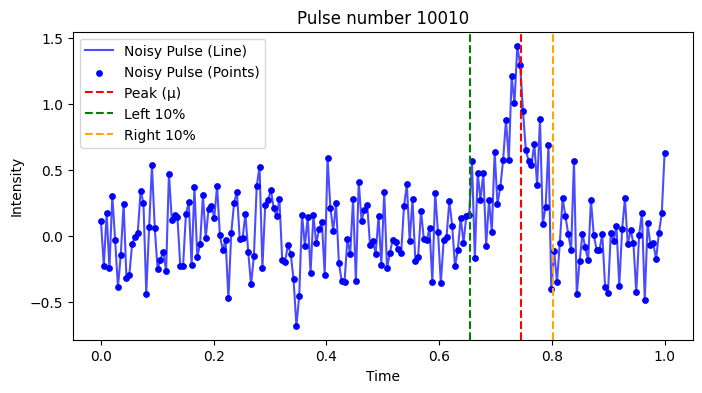

In [58]:
import h5py
import matplotlib.pyplot as plt

# Open the file for reading
with h5py.File("synthetic_pulses_data.h5", "r") as hf:
    pulse_grp = hf["pulses"]
    time_grp = hf["times"]
    mus = hf["mus"][:]    # Load as numpy array
    lefts = hf["lefts"][:]
    rights = hf["rights"][:]

    # Example: Load the nth pulse (e.g., n = 1000)
    n = 10010
    nth_signal = pulse_grp[f"pulse_{n}"][:]  # Convert dataset to numpy array
    nth_x = time_grp[f"time_{n}"][:]
    nth_peak = mus[n]
    nth_left = lefts[n]
    nth_right = rights[n]

print("Pulse index (n):", n)
# print("Noisy signal for pulse n:", nth_signal)
print("Peak (μ):", nth_peak)
print("Left 10% threshold:", nth_left)
print("Right 10% threshold:", nth_right)

# Plot the nth pulse with its thresholds
plt.figure(figsize=(8, 4))
plt.plot(nth_x, nth_signal, label="Noisy Pulse (Line)", color='blue', alpha=0.7)
plt.scatter(nth_x, nth_signal, color='blue', s=15, label="Noisy Pulse (Points)")
plt.axvline(nth_peak, color='red', linestyle='--', label="Peak (μ)")
plt.axvline(nth_left, color='green', linestyle='--', label="Left 10%")
plt.axvline(nth_right, color='orange', linestyle='--', label="Right 10%")
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title(f"Pulse number {n}")
plt.legend()
plt.show()


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

#MAKE AND TRAIN MODEL
#Architecture:
## Overview

- **Input**: A batch of 1D sequences with shape `(batch, sequence_length)`.
- **CNN Component**: Extracts local features using a convolution layer, followed by a non-linear activation (ReLU) and down-sampling via max pooling.
- **LSTM Component**: Processes the extracted features as a sequence, capturing temporal dependencies.
- **Fully Connected Layer**: Maps the LSTM’s hidden state to a 3-dimensional output for regression.

---

## CNN Component

### 1D Convolution Layer

- **Layer Definition**:  
  ```python
  self.conv1 = nn.Conv1d(in_channels=1, out_channels=cnn_channels, kernel_size=5, padding=2)
  ```
- **Input Transformation**:  
  The input tensor `x` originally has shape `(batch, sequence_length)`. We first add a channel dimension to obtain `(batch, 1, sequence_length)`.

- **Mathematical Operation**:  
  For an input signal \( x \) and a filter \( w \) of size \( k = 5 \) with padding \( p = 2 \), the convolution at position \( i \) is given by:
  $$
  y[i] = \sum_{j=-2}^{2} w[j] \cdot x[i+j]
  $$
  Here, the padding ensures that the output has the same length as the input.

### ReLU Activation

- **Operation**:  
  The ReLU (Rectified Linear Unit) activation function is applied element-wise:
  $$
  \text{ReLU}(z) = \max(0, z)
  $$
  This introduces non-linearity into the model.

### Max Pooling

- **Layer Definition**:  
  ```python
  self.pool = nn.MaxPool1d(kernel_size=2)
  ```
- **Effect on Dimensions**:  
  After pooling, the output sequence length is reduced by approximately a factor of 2 (assuming the sequence length is even), i.e., from \( L \) to $ \frac{L}{2} $.

---

## LSTM Component

### Input Preparation

- **Permutation**:  
  The CNN output has shape `(batch, cnn_channels, sequence_length/2)`. It is permuted to `(batch, sequence_length/2, cnn_channels)` to match the expected input shape for the LSTM, where:
  - **Sequence length**: $ T = \frac{L}{2} $
  - **Feature size**: $ F = \text{cnn_channels} $

### LSTM Layer

- **Layer Definition**:  
  ```python
  self.lstm = nn.LSTM(input_size=cnn_channels, hidden_size=lstm_hidden_size, num_layers=lstm_layers, batch_first=True)
  ```
- **Operation**:  
  The LSTM processes the sequence data and captures temporal dependencies. For each time step \( t \), the LSTM cell performs the following operations:

  1. **Forget Gate**:
     $$
     f_t = \sigma(W_f x_t + U_f h_{t-1} + b_f)
     $$
  2. **Input Gate**:
     $$
     i_t = \sigma(W_i x_t + U_i h_{t-1} + b_i)
     $$
  3. **Candidate Cell State**:
     $$
     c_t = \tanh(W_c x_t + U_c h_{t-1} + b_c)
     $$
  4. **Cell State Update**:
     $$
     c_t = f_t \odot c_{t-1} + i_t \odot c_t
     $$
  5. **Output Gate and Hidden State**:
     $$
     o_t = \sigma(W_o x_t + U_o h_{t-1} + b_o)
     $$
     $$
     h_t = o_t \odot \tanh(c_t)
     $$
  
  Here, $ \sigma $ is the sigmoid function, and $ \odot $ denotes element-wise multiplication. The LSTM outputs:
  - **Hidden states** for all time steps.
  - **Final hidden state** $ h_n $ (taken from the last LSTM layer) is used for prediction.

---

## Fully Connected Layer

- **Layer Definition**:  
  ```python
  self.fc = nn.Linear(lstm_hidden_size, 3)
  ```
- **Operation**:  
  The last hidden state $h_n[-1] $ from the LSTM is passed through the fully connected layer:
  $$
  y = W_{fc} h + b_{fc}
  $$
  This linear transformation maps the LSTM output to a 3-dimensional output vector, suitable for regression tasks.

---

## Training Setup

- **Loss Function**:  
  Mean Squared Error (MSE) loss is used for regression:
  $$
  \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
  $$
- **Optimizer**:  
  The Adam optimizer is applied with a learning rate of 0.001:
  ```python
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  ```

---



In [ ]:
import h5py
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence

# ---------------------------
# Define a custom Dataset for HDF5 data
# ---------------------------
class PulseDataset(Dataset):
    def __init__(self, h5_filename):
        # Open the file in read mode
        self.h5_file = h5py.File(h5_filename, 'r')
        self.pulses_group = self.h5_file['pulses']
        # Load target arrays (assumed to be homogeneous)
        self.mus = self.h5_file['mus'][:]    # shape: (n_samples,)
        self.lefts = self.h5_file['lefts'][:]
        self.rights = self.h5_file['rights'][:]
        self.n_samples = self.mus.shape[0]

    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        # Each pulse is stored under the key "pulse_{idx}"
        pulse = self.pulses_group[f"pulse_{idx}"][:]
        # Convert the pulse to a torch tensor (1D tensor of variable length)
        pulse_tensor = torch.tensor(pulse, dtype=torch.float32)
        # Build the target tensor: [mu, left_threshold, right_threshold]
        target = torch.tensor([self.mus[idx], self.lefts[idx], self.rights[idx]], dtype=torch.float32)
        return pulse_tensor, target

# Custom collate_fn to pad variable-length signals in a batch
def collate_fn(batch):
    signals, targets = zip(*batch)
    # Pad the signals along the time dimension (batch_first = True)
    signals_padded = pad_sequence(signals, batch_first=True)
    targets = torch.stack(targets)
    return signals_padded, targets

# Create the dataset and DataLoader
dataset = PulseDataset("synthetic_pulses_data.h5")
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

# ---------------------------
# Define the Hybrid CNN-LSTM Model
# ---------------------------
class HybridCNNLSTM(nn.Module):
    def __init__(self, cnn_channels=32, lstm_hidden_size=64, lstm_layers=1):
        super(HybridCNNLSTM, self).__init__()
        # 1D convolution: expects input of shape (batch, 1, sequence_length)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=cnn_channels, kernel_size=5, padding=2)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        # LSTM: input size = cnn_channels (features from the CNN layer)
        self.lstm = nn.LSTM(input_size=cnn_channels, hidden_size=lstm_hidden_size,
                            num_layers=lstm_layers, batch_first=True)
        # Fully connected layer mapping from LSTM hidden state to 3 regression outputs
        self.fc = nn.Linear(lstm_hidden_size, 3)

    def forward(self, x):
        # x shape: (batch, sequence_length)
        # Add a channel dimension: becomes (batch, 1, sequence_length)
        x = x.unsqueeze(1)
        # Apply convolution, activation, and pooling:
        x = self.conv1(x)      # -> (batch, cnn_channels, sequence_length)
        x = self.relu(x)
        x = self.pool(x)       # -> (batch, cnn_channels, sequence_length/2)
        # Permute to (batch, sequence_length/2, cnn_channels) for LSTM input
        x = x.permute(0, 2, 1)
        # LSTM processing
        out, (h_n, _) = self.lstm(x)
        # Use the last layer's hidden state for prediction
        x = self.fc(h_n[-1])
        return x

# Instantiate model, loss function, and optimizer
model = HybridCNNLSTM().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ---------------------------
# Setup Loss History and Prediction Storage for Specific Pulses
# ---------------------------
loss_history = []       # List to record average loss per epoch
predictions_1000 = []   # To store predicted targets for the 1000th pulse at each epoch
actuals_1000 = []       # To store actual targets for the 1000th pulse
predictions_2000 = []   # Similarly for the 2000th pulse
actuals_2000 = []

num_epochs = 100  # Total number of training epochs

# ---------------------------
# Training Loop
# ---------------------------
for epoch in range(num_epochs):
    print(f"Starting epoch {epoch+1}", flush=True)
    model.train()  # Ensure the model is in training mode
    epoch_loss = 0.0
    for batch_signals, batch_targets in dataloader:
        batch_signals, batch_targets = batch_signals.to(device), batch_targets.to(device)

        optimizer.zero_grad()
        outputs = model(batch_signals)
        loss = criterion(outputs, batch_targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(dataloader)
    loss_history.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.9f}", flush=True)

    # Evaluate predictions for pulse 1000 and 2000
    model.eval()  # Switch to evaluation mode
    with torch.inference_mode():
        # Check if indices 1000 and 2000 exist
        if len(dataset) > 2000:
            # For the 1000th pulse:
            pulse_1000, target_1000 = dataset[1000]
            pulse_1000 = pulse_1000.unsqueeze(0)  # Add batch dimension
            pred_1000 = model(torch.Tensor(pulse_1000).to(device))
            predictions_1000.append(pred_1000.cpu().numpy())
            actuals_1000.append(target_1000.cpu().numpy())
            # For the 2000th pulse:
            pulse_2000, target_2000 = dataset[2000]
            pulse_2000 = pulse_2000.unsqueeze(0)
            pred_2000 = model(torch.Tensor(pulse_2000).to(device))
            predictions_2000.append(pred_2000.cpu().numpy())
            actuals_2000.append(target_2000.cpu().numpy())

    # Return to training mode for the next epoch
    model.train()

# Save the final model
torch.save(model.state_dict(), "hybrid_cnn_lstm_model_final.pth")
print("Training complete. Model saved as 'hybrid_cnn_lstm_model_final.pth'.")


Starting epoch 1
Epoch 1/100, Loss: 0.032208428
Starting epoch 2
Epoch 2/100, Loss: 0.009133646
Starting epoch 3
Epoch 3/100, Loss: 0.000619459
Starting epoch 4
Epoch 4/100, Loss: 0.000792469
Starting epoch 5
Epoch 5/100, Loss: 0.000558437
Starting epoch 6
Epoch 6/100, Loss: 0.000271002
Starting epoch 7
Epoch 7/100, Loss: 0.000258400
Starting epoch 8
Epoch 8/100, Loss: 0.000234450
Starting epoch 9
Epoch 9/100, Loss: 0.000213958
Starting epoch 10
Epoch 10/100, Loss: 0.000212747
Starting epoch 11
Epoch 11/100, Loss: 0.000278301
Starting epoch 12
Epoch 12/100, Loss: 0.000195812
Starting epoch 13
Epoch 13/100, Loss: 0.000184892
Starting epoch 14
Epoch 14/100, Loss: 0.000163407
Starting epoch 15
Epoch 15/100, Loss: 0.000161490
Starting epoch 16
Epoch 16/100, Loss: 0.000183081
Starting epoch 17
Epoch 17/100, Loss: 0.000146692
Starting epoch 18
Epoch 18/100, Loss: 0.000154590
Starting epoch 19
Epoch 19/100, Loss: 0.000163465
Starting epoch 20
Epoch 20/100, Loss: 0.000149526
Starting epoch 21


#TRIAL WITH GPU
###Reference values:

619 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

619 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Original Targets:
Peak (μ): 0.6762750043878725
Left 10% threshold: 0.5987246857378838
Right 10% threshold: 0.7204484776551425

Model Prediction:
Predicted Peak: 0.681346
Predicted Left 10%: 0.60072786
Predicted Right 10%: 0.72349083


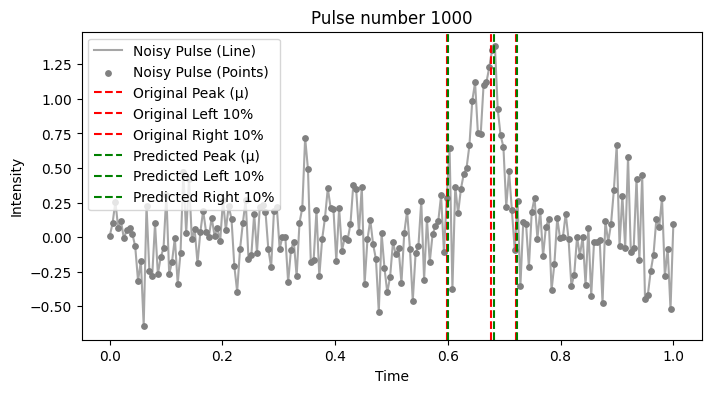

In [122]:
import h5py
import torch
import matplotlib.pyplot as plt

# Open the file for reading
with h5py.File("synthetic_pulses_data.h5", "r") as hf:
    pulse_grp = hf["pulses"]
    time_grp = hf["times"]
    mus = hf["mus"][:]    # Load as numpy array
    lefts = hf["lefts"][:]
    rights = hf["rights"][:]

    # Example: Load the nth pulse (e.g., n = 1000)
    n = 1000
    nth_signal = pulse_grp[f"pulse_{n}"][:]  # Convert dataset to numpy array
    nth_time = time_grp[f"time_{n}"][:]
    nth_peak = mus[n]
    nth_left = lefts[n]
    nth_right = rights[n]


# Convert the sample signal to a torch tensor and run through the model
model.eval()
with torch.no_grad():
    sample_tensor = torch.tensor(nth_signal, dtype=torch.float32).unsqueeze(0)  # add batch dimension

    %timeit pred = model(sample_tensor.to(device)).squeeze().cpu().numpy()

# Print original and predicted values
print("Original Targets:")
print("Peak (μ):", nth_peak)
print("Left 10% threshold:", nth_left)
print("Right 10% threshold:", nth_right)
print("\nModel Prediction:")
print("Predicted Peak:", pred[0])
print("Predicted Left 10%:", pred[1])
print("Predicted Right 10%:", pred[2])

# Plotting the nth pulse with original thresholds
plt.figure(figsize=(8, 4))
plt.plot(nth_time, nth_signal, label="Noisy Pulse (Line)", color='grey', alpha=0.7)
plt.scatter(nth_time, nth_signal, color='grey', s=15, label="Noisy Pulse (Points)")
plt.axvline(nth_peak, color='red', linestyle='--', label="Original Peak (μ)")
plt.axvline(nth_left, color='red', linestyle='--', label="Original Left 10%")
plt.axvline(nth_right, color='red', linestyle='--', label="Original Right 10%")
plt.axvline(pred[0], color='green', linestyle='--', label="Predicted Peak (μ)")
plt.axvline(pred[1], color='green', linestyle='--', label="Predicted Left 10%")
plt.axvline(pred[2], color='green', linestyle='--', label="Predicted Right 10%")

plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title(f"Pulse number {n}")
plt.legend()
plt.show()


#TRIAL WITH CPU
###Reference data:
CPU times: user 2.75 ms, sys: 0 ns, total: 2.75 ms
Wall time: 2.6 ms

In [9]:
import h5py
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence

# ---------------------------
# Define a custom Dataset for HDF5 data
# ---------------------------
class PulseDataset(Dataset):
    def __init__(self, h5_filename):
        # Open the file in read mode
        self.h5_file = h5py.File(h5_filename, 'r')
        self.pulses_group = self.h5_file['pulses']
        # Load target arrays (assumed to be homogeneous)
        self.mus = self.h5_file['mus'][:]    # shape: (n_samples,)
        self.lefts = self.h5_file['lefts'][:]
        self.rights = self.h5_file['rights'][:]
        self.n_samples = self.mus.shape[0]

    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        # Each pulse is stored under the key "pulse_{idx}"
        pulse = self.pulses_group[f"pulse_{idx}"][:]
        # Convert the pulse to a torch tensor (1D tensor of variable length)
        pulse_tensor = torch.tensor(pulse, dtype=torch.float32)
        # Build the target tensor: [mu, left_threshold, right_threshold]
        target = torch.tensor([self.mus[idx], self.lefts[idx], self.rights[idx]], dtype=torch.float32)
        return pulse_tensor, target

# Custom collate_fn to pad variable-length signals in a batch
def collate_fn(batch):
    signals, targets = zip(*batch)
    # Pad the signals along the time dimension (batch_first = True)
    signals_padded = pad_sequence(signals, batch_first=True)
    targets = torch.stack(targets)
    return signals_padded, targets

# Create the dataset and DataLoader
dataset = PulseDataset("synthetic_pulses_data.h5")
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

# ---------------------------
# Define the Hybrid CNN-LSTM Model
# ---------------------------
class HybridCNNLSTM(nn.Module):
    def __init__(self, cnn_channels=32, lstm_hidden_size=64, lstm_layers=1):
        super(HybridCNNLSTM, self).__init__()
        # 1D convolution: expects input of shape (batch, 1, sequence_length)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=cnn_channels, kernel_size=5, padding=2)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        # LSTM: input size = cnn_channels (features from the CNN layer)
        self.lstm = nn.LSTM(input_size=cnn_channels, hidden_size=lstm_hidden_size,
                            num_layers=lstm_layers, batch_first=True)
        # Fully connected layer mapping from LSTM hidden state to 3 regression outputs
        self.fc = nn.Linear(lstm_hidden_size, 3)

    def forward(self, x):
        # x shape: (batch, sequence_length)
        # Add a channel dimension: becomes (batch, 1, sequence_length)
        x = x.unsqueeze(1)
        # Apply convolution, activation, and pooling:
        x = self.conv1(x)      # -> (batch, cnn_channels, sequence_length)
        x = self.relu(x)
        x = self.pool(x)       # -> (batch, cnn_channels, sequence_length/2)
        # Permute to (batch, sequence_length/2, cnn_channels) for LSTM input
        x = x.permute(0, 2, 1)
        # LSTM processing
        out, (h_n, _) = self.lstm(x)
        # Use the last layer's hidden state for prediction
        x = self.fc(h_n[-1])
        return x


In [14]:

# To load the model later:
# 1. Initialize the model instance with the same architecture
model = HybridCNNLSTM()
# 2. Load the saved state_dict into the model
model.load_state_dict(torch.load("hybrid_cnn_lstm_model_final_1.pth", map_location=torch.device('cpu')))
model.eval()  # Set the model to evaluation mode
print("Model loaded successfully.")


Model loaded successfully.


<ipython-input-14-c856b1e420d4>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("hybrid_cnn_lstm_model_final_1.pth", map_location=torch.dev

CPU times: user 2.75 ms, sys: 0 ns, total: 2.75 ms
Wall time: 2.6 ms
Original Targets:
Peak (μ): 0.779260949472715
Left 10% threshold: 0.711135840494146
Right 10% threshold: 0.8546647273117529

Model Prediction:
Predicted Peak: 0.78043675
Predicted Left 10%: 0.71467775
Predicted Right 10%: 0.8611728



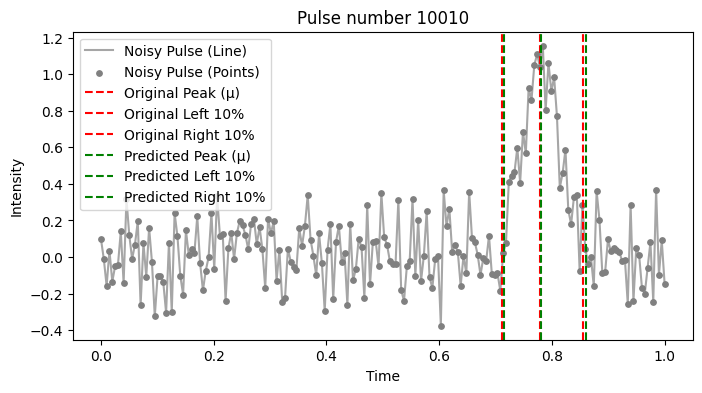

In [59]:


np.random.seed(np.random.randint(0,1000))
nth_time, nth_signal, nth_peak, nth_left, nth_right = generate_pulse(200, 1, 0.15)

# Convert the sample signal to a torch tensor and run through the model
model.eval()
with torch.inference_mode():
    sample_tensor = torch.tensor(nth_signal, dtype=torch.float32).unsqueeze(0)  # add batch dimension
    %time pred = model(sample_tensor).squeeze().numpy()

print("Original Targets:")
print("Peak (μ):", nth_peak)
print("Left 10% threshold:", nth_left)
print("Right 10% threshold:", nth_right)
print("\nModel Prediction:")
print("Predicted Peak:", pred[0])
print("Predicted Left 10%:", pred[1])
print("Predicted Right 10%:", pred[2])

print()

# Plotting the nth pulse with original thresholds
plt.figure(figsize=(8, 4))
plt.plot(nth_time, nth_signal, label="Noisy Pulse (Line)", color='grey', alpha=0.7)
plt.scatter(nth_time, nth_signal, color='grey', s=15, label="Noisy Pulse (Points)")
plt.axvline(nth_peak, color='red', linestyle='--', label="Original Peak (μ)")
plt.axvline(nth_left, color='red', linestyle='--', label="Original Left 10%")
plt.axvline(nth_right, color='red', linestyle='--', label="Original Right 10%")
plt.axvline(pred[0], color='green', linestyle='--', label="Predicted Peak (μ)")
plt.axvline(pred[1], color='green', linestyle='--', label="Predicted Left 10%")
plt.axvline(pred[2], color='green', linestyle='--', label="Predicted Right 10%")

plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title(f"Pulse number {n}")
plt.legend()
plt.show()


#COMPARISION WITH GAUSSIAN REGRESSION (CPU)
###Reference data:
GPR Fit Time: 2.3633 seconds
GPR Prediction Time: 0.1065 seconds


GPR Fit Time: 2.3633 seconds
GPR Prediction Time: 0.1065 seconds

True Values:
Peak: 0.7793, Left Threshold: 0.7111, Right Threshold: 0.8547

Predicted Values:
Peak: 0.7798, Left Threshold: 0.7130, Right Threshold: 0.8551


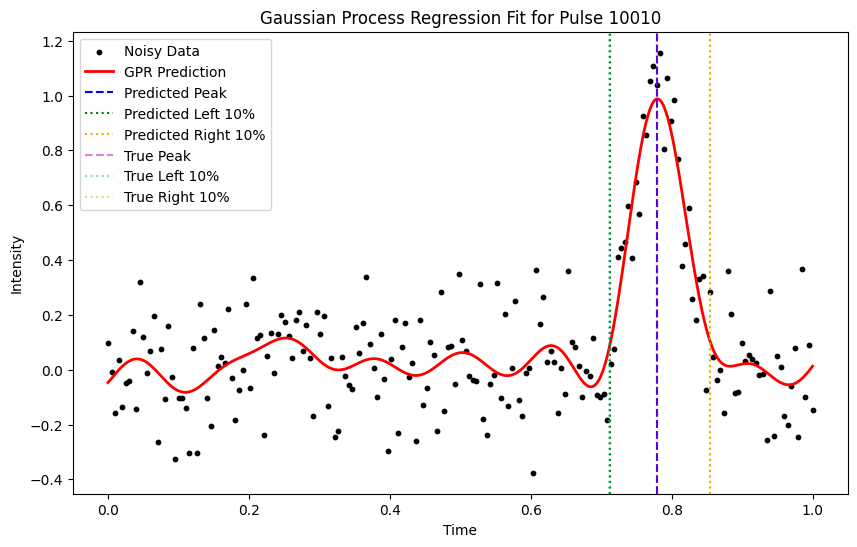

In [60]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import time

# # Load the dataset
# n = 1000  # Example pulse index
# with h5py.File("synthetic_pulses_data.h5", "r") as hf:
#     pulse_grp = hf["pulses"]
#     time_grp = hf["times"]
#     mus = hf["mus"][:]
#     lefts = hf["lefts"][:]
#     rights = hf["rights"][:]

#     nth_signal = pulse_grp[f"pulse_{n}"][:]
#     nth_x = time_grp[f"time_{n}"][:]
#     nth_peak_true = mus[n]
#     nth_left_true = lefts[n]
#     nth_right_true = rights[n]

nth_x = nth_time
nth_peak_true = nth_peak
nth_left_true = nth_left
nth_right_true = nth_right
# Prepare data for GPR
X = nth_x.reshape(-1, 1)
y = nth_signal.ravel()

# Define the kernel with initial parameters and bounds
kernel = RBF(length_scale=0.05) + WhiteKernel(noise_level=0.1)
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Time the fitting process
start_fit = time.time()
gpr.fit(X, y)
fit_time = time.time() - start_fit

# Generate a dense time grid for prediction
x_dense = np.linspace(nth_x.min(), nth_x.max(), 10000).reshape(-1, 1)

# Time the prediction
start_pred = time.time()
y_mean, y_std = gpr.predict(x_dense, return_std=True)
pred_time = time.time() - start_pred

# Find peak coordinates
peak_idx = np.argmax(y_mean)
peak_amp = y_mean[peak_idx]
peak_time = x_dense[peak_idx, 0]
threshold = 0.1 * peak_amp

# Function to find threshold crossing with interpolation
def find_threshold(x_values, y_values, threshold):
    # Check if all values are above threshold
    if np.all(y_values > threshold):
        return None
    # Find where the values cross the threshold
    below = y_values <= threshold
    # Get the indices where the transition happens
    transition = np.where(below[:-1] != below[1:])[0]
    if len(transition) == 0:
        return None
    # Take the first transition from above to below
    for idx in transition:
        if not below[idx] and below[idx+1]:
            left_idx = idx
            right_idx = idx + 1
            x_left = x_values[left_idx]
            y_left = y_values[left_idx]
            x_right = x_values[right_idx]
            y_right = y_values[right_idx]
            # Linear interpolation
            alpha = (threshold - y_right) / (y_left - y_right)
            x_thresh = x_right + alpha * (x_left - x_right)
            return x_thresh
    return None
# Find left threshold (to the left of the peak)
left_mask = x_dense < peak_time
x_left = x_dense[left_mask].flatten()
y_left = y_mean[left_mask.flatten()]  # Fix here
# Reverse to start from peak and go left
x_left_rev = x_left[::-1]
y_left_rev = y_left[::-1]
left_threshold = find_threshold(x_left_rev, y_left_rev, threshold)

# Find right threshold (to the right of the peak)
right_mask = x_dense > peak_time
x_right = x_dense[right_mask].flatten()
y_right = y_mean[right_mask.flatten()]  # Fix here
right_threshold = find_threshold(x_right, y_right, threshold)


# Output results
print(f"GPR Fit Time: {fit_time:.4f} seconds")
print(f"GPR Prediction Time: {pred_time:.4f} seconds")
print("\nTrue Values:")
print(f"Peak: {nth_peak_true:.4f}, Left Threshold: {nth_left_true:.4f}, Right Threshold: {nth_right_true:.4f}")
print("\nPredicted Values:")
print(f"Peak: {peak_time:.4f}, Left Threshold: {left_threshold:.4f}, Right Threshold: {right_threshold:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='k', s=10, label="Noisy Data")
plt.plot(x_dense, y_mean, 'r-', lw=2, label="GPR Prediction")
plt.axvline(peak_time, color='b', linestyle='--', label="Predicted Peak")
plt.axvline(left_threshold, color='g', linestyle=':', label="Predicted Left 10%")
plt.axvline(right_threshold, color='orange', linestyle=':', label="Predicted Right 10%")
plt.axvline(nth_peak_true, color='m', linestyle='--', alpha=0.5, label="True Peak")
plt.axvline(nth_left_true, color='c', linestyle=':', alpha=0.5, label="True Left 10%")
plt.axvline(nth_right_true, color='y', linestyle=':', alpha=0.5, label="True Right 10%")
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title(f"Gaussian Process Regression Fit for Pulse {n}")
plt.legend()
plt.show()

